In [3]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings(action='ignore')
# import nltk
#nltk.download('all') # 처음 실행 시 주석을 제거하고 실행해주세요!

In [4]:
from tqdm import tqdm


In [5]:
df = pd.read_excel('news_label.xlsx', engine='openpyxl')

In [28]:
df

,date,content,label
0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//[\n마스카라까지 지우...,0.0
1,2021.10.07,"[[격동의 유통가④]편의점 성장 정체…미래는 근거리 쇼핑]//[""파괴적 커머스 시대...",1.0
2,2021.10.08,[株머니 매니저의 HOT종목]//[\n\n\n\n\n 씨에스윈드는 풍력발전기를 구성...,1.0
3,2021.10.11,"[김민수 더맘마 대표 ""동네마트와 '상생'이 경쟁력…30분 총알배송 목표""]//[\...",0.0
4,2021.10.13,"[""카카오 보고있나""…진격의 네이버페이, 中 최대 직구몰 손잡았다]//[[주간투자동...",1.0
...,...,...,...
274,2022.09.23,"[WCP 흥행 실패에 컬리, 케이뱅크 상장 시기 '안갯속']//[\n심사 승인 났는...",-
275,2022.09.26,"[[먹거리+IT] 네이처랩 오경주 대표, “맛있고 건강한 주스 추천 서비스를 개발합...",-
276,2022.09.27,"[""투자 늘렸는데 이제와서…"" 퀵커머스마저 규제하나 '초긴장']//[\n■국감 오르...",-
277,2022.09.29,[국내 이커머스 상장 1호 주인공 누가될까 [격변의 이커머스①]]//[\n이커머스 ...,-


<AxesSubplot:>

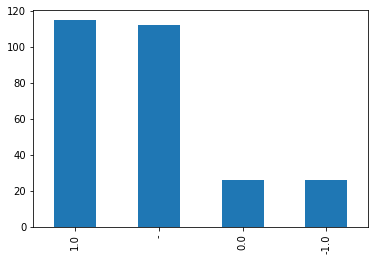

In [30]:
df['label'].value_counts().plot(kind='bar')

In [6]:
df = df.rename(columns={'dates':'date', 'titles':'title','contents':'content'})
df['content'] = df['title'] + df['content']

In [7]:
df = df.drop(columns=['근거', 'title'])

In [24]:
train = df[:167]
# train['label'] = train['label'].astype(int)
train

,date,content,label
0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//[\n마스카라까지 지우...,0
1,2021.10.07,"[[격동의 유통가④]편의점 성장 정체…미래는 근거리 쇼핑]//[""파괴적 커머스 시대...",1
2,2021.10.08,[株머니 매니저의 HOT종목]//[\n\n\n\n\n 씨에스윈드는 풍력발전기를 구성...,1
3,2021.10.11,"[김민수 더맘마 대표 ""동네마트와 '상생'이 경쟁력…30분 총알배송 목표""]//[\...",0
4,2021.10.13,"[""카카오 보고있나""…진격의 네이버페이, 中 최대 직구몰 손잡았다]//[[주간투자동...",1
...,...,...,...
162,2022.04.22,"[NH투자증권, SK에코플랜트 주관사 선정… IPO 실적 호조]//[우리생협, 오아...",-1
163,2022.04.25,[“500억 투자했는데”... 홍정국의 아픈 손가락 ‘헬로네이처’ 매각 적신호]//...,1
164,2022.04.26,"[오아시스마켓 ""오프라인 매장 간판서 '생협' 제외""]//[[고고IPO] ‘업계 4...",1
165,2022.04.27,[[마켓인]프롭테크하면 무조건 뜬다?…투자유치 '부익부 빈익빈']//[IPO 앞둔 ...,-1


In [9]:
# test set
test = df[167:]
test

,date,content,label
167,2022.04.29,"[공정위, 새벽배송업체 오아시스 ‘생협 간판’ 사용에 제동]//[""무조건 창업 한번...",-
168,2022.04.30,[코로나 엔데믹 전환에 배송전쟁 판도 변화…점유율 경쟁 보다 ‘수익성’]//[\n롯...,-
169,2022.05.02,[창업자 188명 '지상 IR' 날개…K-스타트업 등용문 '우뚝']//[오아시스마켓...,-
170,2022.05.03,"[[엔데믹, 오다]이커머스 '옥석 가리기' 본격 시동]//[우여곡절 끝에 IPO 첫...",-
171,2022.05.04,[9조 원 규모 새벽배송 누가 살아남을까? 돈의 전쟁이 시작됐다!]//[\n\t\t...,-
...,...,...,...
274,2022.09.23,"[WCP 흥행 실패에 컬리, 케이뱅크 상장 시기 '안갯속']//[\n심사 승인 났는...",-
275,2022.09.26,"[[먹거리+IT] 네이처랩 오경주 대표, “맛있고 건강한 주스 추천 서비스를 개발합...",-
276,2022.09.27,"[""투자 늘렸는데 이제와서…"" 퀵커머스마저 규제하나 '초긴장']//[\n■국감 오르...",-
277,2022.09.29,[국내 이커머스 상장 1호 주인공 누가될까 [격변의 이커머스①]]//[\n이커머스 ...,-


### 학습/검증셋 분리

In [10]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train)
train.reset_index(inplace=True) # 전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화해주었습니다.
val.reset_index(inplace=True)

In [11]:
### train.set_index('date')

train = train.drop(columns = ['index'])
train

,date,content,label
0,2021.12.20,[IPO 문 닫는 래몽래인…올해 증권사‧종목별 성적 어땠나]//[더 뜨거워지는 공모...,1.0
1,2021.11.11,"[기념일마다 선물에 월급날엔 일찍 집으로··· MZ가 '픽'한 플랫폼 5총사, 복지...",1.0
2,2022.02.04,[투자자 돈 쓸어 담은 비상장주는? 토스·야놀자·루닛…‘드림개미’ 사로잡다]//[저...,-1.0
3,2021.12.23,"[코인빗, 가상자산사업자 신고 철회…서비스 종료 수순]//[내년 IPO ‘더 큰 장...",1.0
4,2021.12.22,"[NHN페이코, 연말 맞이 ‘페이코 포인트 플러스’ 적립 이벤트]//[\n ...",0.0
...,...,...,...
120,2022.04.18,"['새벽배송' 대신 '퀵커머스' 올인하는 유통가, 왜?]//[\n\n\n\n\n포켓...",0.0
121,2021.12.21,[내년 IPO시장 `후끈`…초대어급 줄상장 `예고` [이슈플러스]]//[[민지리뷰]...,1.0
122,2021.12.26,[[아듀 2021]코로나發 스타트업 고성장…두나무·직방·컬리·당근 '新유니콘']//...,0.0
123,2022.03.16,"[오아시스·이마트도 출격…판 커지는 '퀵커머스 대전']//[""주문 즉시 배송"" 유통...",1.0


In [12]:
val

,index,date,content,label
0,152,2022.04.12,"[새벽배송 1호 컬리, 목표 시총 6조지만…거품 논란도]//[케이뱅크, MZ세대 맞...",-1.0
1,77,2022.01.06,[흑자 비결 여기있었네…‘효율 끝판왕’ 오아시스 물류센터 가보니]//[\n<다시 뛰...,1.0
2,13,2021.10.26,"[[마켓인]국내 투자사, 가상자산 '주춤'에도 관련 기업 투자 속속]//[쿠팡맨 이...",1.0
3,144,2022.03.30,[SK쉴더스·원스토어 출격...얼어붙은 IPO시장 녹인다]//[상장 앞둔 '오아시스...,1.0
4,74,2022.01.03,[[2022 증시③] 업종 기상도...반도체·車 ‘맑음’ 조선·증권 ‘흐림’]//[...,1.0
5,68,2021.12.28,[내년 더 뜨거워진다... 30조 바라보는 IPO시장 관전포인트는?]//[\n\t\...,1.0
6,57,2021.12.15,"['각자도생' 살길 찾는 1세대 이커머스]//[미스터아빠-데이웰즈, 경북프레쉬 센터...",1.0
7,83,2022.01.13,"[오아시스마켓 등판...식품 라이브커머스 치열해진다]//[오아시스마켓, 라이브 커머...",1.0
8,36,2021.11.23,"[‘후끈’ 달아오른 장외 시장…MZ세대 비상장 숨은 보석에 꽂히다]//[금융위 ""N...",0.0
9,23,2021.11.05,"['상장 추진' 컬리·SSG·오아시스, 벌써 신경전]//[동네슈퍼도 퀵커머스 가능해...",1.0


### 데이터 정제하기

In [13]:
# 문자 외의 것들 제거
train['content'] = train['content'].str.replace('[^가-힣a-zA-Z0-9_]',' ')
# 혹시 모를 다중 공백 제거
train['content'] = train['content'].str.replace(' +',' ') 
train

,date,content,label
0,2021.12.20,IPO 문 닫는 래몽래인 올해 증권사 종목별 성적 어땠나 더 뜨거워지는 공모주 열...,1.0
1,2021.11.11,기념일마다 선물에 월급날엔 일찍 집으로 MZ가 픽 한 플랫폼 5총사 복지도 톡톡 ...,1.0
2,2022.02.04,투자자 돈 쓸어 담은 비상장주는 토스 야놀자 루닛 드림개미 사로잡다 저성장 궤도 ...,-1.0
3,2021.12.23,코인빗 가상자산사업자 신고 철회 서비스 종료 수순 내년 IPO 더 큰 장 열린다 ...,1.0
4,2021.12.22,NHN페이코 연말 맞이 페이코 포인트 플러스 적립 이벤트 NHN페이코는 연말을 맞...,0.0
...,...,...,...
120,2022.04.18,새벽배송 대신 퀵커머스 올인하는 유통가 왜 포켓CU 리뉴얼 사진제공 BGF리테일롯...,0.0
121,2021.12.21,내년 IPO시장 후끈 초대어급 줄상장 예고 이슈플러스 민지리뷰 띵동 건강한 유기농...,1.0
122,2021.12.26,아듀 2021 코로나 스타트업 고성장 두나무 직방 컬리 당근 유니콘 올해 국내 스...,0.0
123,2022.03.16,오아시스 이마트도 출격 판 커지는 퀵커머스 대전 주문 즉시 배송 유통가 퀵커머스 ...,1.0


<AxesSubplot:>

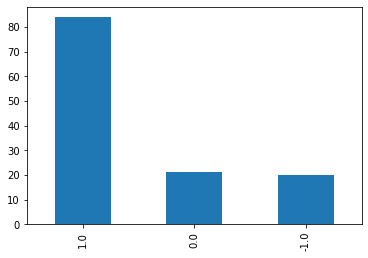

In [14]:
train['label'].value_counts().plot(kind='bar')

### 토큰화

In [15]:
from konlpy.tag import Okt

In [16]:
okt = Okt()

In [17]:
tokenized = [] # 데이터프레임의 한 컬럼으로 추가할 리스트
for sentence in train['content']: # 전처리된 리뷰들을 하나씩 꺼내옵니다
    tokens = okt.morphs(sentence, stem = True) # 형태소 분석 (stem = True로 설정해 어간 추출을 해주었습니다)
    tokenize = " ".join(tokens) # tokens라는 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    tokenized.append(tokenize) # 형태소 단위로 띄어쓰기된 문자열을 최종 리스트에 추가해줍니다
train["tokenized_stem"] = pd.DataFrame(tokenized) # 리스트를 데이터프레임으로 변환해 tokenized_stem라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,date,content,label,tokenized_stem
0,2021.12.20,IPO 문 닫는 래몽래인 올해 증권사 종목별 성적 어땠나 더 뜨거워지는 공모주 열...,1.0,IPO 문 닫다 래몽래 인 올해 증권사 종목 별 성적 어떻다 더 뜨겁다 공 모주 열...
1,2021.11.11,기념일마다 선물에 월급날엔 일찍 집으로 MZ가 픽 한 플랫폼 5총사 복지도 톡톡 ...,1.0,기념일 마다 선물 에 월급 날 엔 일찍 집 으로 MZ 가다 픽 하다 플랫폼 5 총사...
2,2022.02.04,투자자 돈 쓸어 담은 비상장주는 토스 야놀자 루닛 드림개미 사로잡다 저성장 궤도 ...,-1.0,투자자 돈 쓸다 담다 비상 장주 는 토스 야 놀다 루닛 드림 개미 사로자다 저 성장...
3,2021.12.23,코인빗 가상자산사업자 신고 철회 서비스 종료 수순 내년 IPO 더 큰 장 열린다 ...,1.0,코인 빗 가상 자산 사업자 신고 철회 서비스 종료 수순 내년 IPO 더 크다 장 열...
4,2021.12.22,NHN페이코 연말 맞이 페이코 포인트 플러스 적립 이벤트 NHN페이코는 연말을 맞...,0.0,NHN 페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 NHN 페이 코 는 ...


In [20]:
train['label'] = train['label'].astype(int)
train

,date,content,label,tokenized_stem
0,2021.12.20,IPO 문 닫는 래몽래인 올해 증권사 종목별 성적 어땠나 더 뜨거워지는 공모주 열...,1,IPO 문 닫다 래몽래 인 올해 증권사 종목 별 성적 어떻다 더 뜨겁다 공 모주 열...
1,2021.11.11,기념일마다 선물에 월급날엔 일찍 집으로 MZ가 픽 한 플랫폼 5총사 복지도 톡톡 ...,1,기념일 마다 선물 에 월급 날 엔 일찍 집 으로 MZ 가다 픽 하다 플랫폼 5 총사...
2,2022.02.04,투자자 돈 쓸어 담은 비상장주는 토스 야놀자 루닛 드림개미 사로잡다 저성장 궤도 ...,-1,투자자 돈 쓸다 담다 비상 장주 는 토스 야 놀다 루닛 드림 개미 사로자다 저 성장...
3,2021.12.23,코인빗 가상자산사업자 신고 철회 서비스 종료 수순 내년 IPO 더 큰 장 열린다 ...,1,코인 빗 가상 자산 사업자 신고 철회 서비스 종료 수순 내년 IPO 더 크다 장 열...
4,2021.12.22,NHN페이코 연말 맞이 페이코 포인트 플러스 적립 이벤트 NHN페이코는 연말을 맞...,0,NHN 페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 NHN 페이 코 는 ...
...,...,...,...,...
120,2022.04.18,새벽배송 대신 퀵커머스 올인하는 유통가 왜 포켓CU 리뉴얼 사진제공 BGF리테일롯...,0,새벽 배송 대신 퀵 커머스 올인 하다 유통 가 왜 포켓 CU 리뉴얼 사진 제공 BG...
121,2021.12.21,내년 IPO시장 후끈 초대어급 줄상장 예고 이슈플러스 민지리뷰 띵동 건강한 유기농...,1,내년 IPO 시장 후끈 초대 어 급 줄 상장 예고 이슈 플러스 민지 리뷰 띵동 건강...
122,2021.12.26,아듀 2021 코로나 스타트업 고성장 두나무 직방 컬리 당근 유니콘 올해 국내 스...,0,아듀 2021 코로나 스타트업 고 성장 두 나무 직방 컬리 당근 유니콘 올해 국내 ...
123,2022.03.16,오아시스 이마트도 출격 판 커지는 퀵커머스 대전 주문 즉시 배송 유통가 퀵커머스 ...,1,오아시스 이마트 도 출격 판 커지다 퀵 커머스 대전 주문 즉시 배송 유통 가 퀵 커...


### 품사 태깅 / 불용어 처리와 비슷한 느낌

In [21]:
main_pos = [] # 데이터프레임의 새 컬럼이 될 리스트
for sentence in train['content']: # 리뷰들을 하나씩 가져옵니다
    pos = okt.pos(sentence) # 형태소 분석을 진행하고 해당 리스트를 pos라는 변수로 받습니다
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
    main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    main_pos.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
train["main_pos"] = pd.DataFrame(main_pos) # 리스트를 데이터프레임으로 변환해 main_pos라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,date,content,label,tokenized_stem,main_pos
0,2021.12.20,IPO 문 닫는 래몽래인 올해 증권사 종목별 성적 어땠나 더 뜨거워지는 공모주 열...,1,IPO 문 닫다 래몽래 인 올해 증권사 종목 별 성적 어떻다 더 뜨겁다 공 모주 열...,문 닫는 래몽래 올해 증권사 종목 별 성적 어땠나 더 뜨거워지는 모주 열기 캘린더 ...
1,2021.11.11,기념일마다 선물에 월급날엔 일찍 집으로 MZ가 픽 한 플랫폼 5총사 복지도 톡톡 ...,1,기념일 마다 선물 에 월급 날 엔 일찍 집 으로 MZ 가다 픽 하다 플랫폼 5 총사...,기념일 선물 월급 날 일찍 집 가 픽 한 플랫폼 총사 복지 톡톡 튀네 르포 핸드 드...
2,2022.02.04,투자자 돈 쓸어 담은 비상장주는 토스 야놀자 루닛 드림개미 사로잡다 저성장 궤도 ...,-1,투자자 돈 쓸다 담다 비상 장주 는 토스 야 놀다 루닛 드림 개미 사로자다 저 성장...,투자자 돈 쓸어 담은 비상 장주 토스 놀자 루닛 드림 개미 사로잡다 성장 궤도 접어...
3,2021.12.23,코인빗 가상자산사업자 신고 철회 서비스 종료 수순 내년 IPO 더 큰 장 열린다 ...,1,코인 빗 가상 자산 사업자 신고 철회 서비스 종료 수순 내년 IPO 더 크다 장 열...,코인 빗 가상 자산 사업자 신고 철회 서비스 종료 수순 내년 더 큰 장 린다 와우 ...
4,2021.12.22,NHN페이코 연말 맞이 페이코 포인트 플러스 적립 이벤트 NHN페이코는 연말을 맞...,0,NHN 페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 NHN 페이 코 는 ...,페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 페이 코 연말 맞아 페이크 ...


In [22]:
train

,date,content,label,tokenized_stem,main_pos
0,2021.12.20,IPO 문 닫는 래몽래인 올해 증권사 종목별 성적 어땠나 더 뜨거워지는 공모주 열...,1,IPO 문 닫다 래몽래 인 올해 증권사 종목 별 성적 어떻다 더 뜨겁다 공 모주 열...,문 닫는 래몽래 올해 증권사 종목 별 성적 어땠나 더 뜨거워지는 모주 열기 캘린더 ...
1,2021.11.11,기념일마다 선물에 월급날엔 일찍 집으로 MZ가 픽 한 플랫폼 5총사 복지도 톡톡 ...,1,기념일 마다 선물 에 월급 날 엔 일찍 집 으로 MZ 가다 픽 하다 플랫폼 5 총사...,기념일 선물 월급 날 일찍 집 가 픽 한 플랫폼 총사 복지 톡톡 튀네 르포 핸드 드...
2,2022.02.04,투자자 돈 쓸어 담은 비상장주는 토스 야놀자 루닛 드림개미 사로잡다 저성장 궤도 ...,-1,투자자 돈 쓸다 담다 비상 장주 는 토스 야 놀다 루닛 드림 개미 사로자다 저 성장...,투자자 돈 쓸어 담은 비상 장주 토스 놀자 루닛 드림 개미 사로잡다 성장 궤도 접어...
3,2021.12.23,코인빗 가상자산사업자 신고 철회 서비스 종료 수순 내년 IPO 더 큰 장 열린다 ...,1,코인 빗 가상 자산 사업자 신고 철회 서비스 종료 수순 내년 IPO 더 크다 장 열...,코인 빗 가상 자산 사업자 신고 철회 서비스 종료 수순 내년 더 큰 장 린다 와우 ...
4,2021.12.22,NHN페이코 연말 맞이 페이코 포인트 플러스 적립 이벤트 NHN페이코는 연말을 맞...,0,NHN 페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 NHN 페이 코 는 ...,페이 코 연말 맞이 페이 코 포인트 플러스 적립 이벤트 페이 코 연말 맞아 페이크 ...
...,...,...,...,...,...
120,2022.04.18,새벽배송 대신 퀵커머스 올인하는 유통가 왜 포켓CU 리뉴얼 사진제공 BGF리테일롯...,0,새벽 배송 대신 퀵 커머스 올인 하다 유통 가 왜 포켓 CU 리뉴얼 사진 제공 BG...,새벽 배송 대신 퀵 커머스 올인 하는 유통 왜 포켓 리뉴얼 사진 제공 리테일 롯데 ...
121,2021.12.21,내년 IPO시장 후끈 초대어급 줄상장 예고 이슈플러스 민지리뷰 띵동 건강한 유기농...,1,내년 IPO 시장 후끈 초대 어 급 줄 상장 예고 이슈 플러스 민지 리뷰 띵동 건강...,내년 시장 후끈 초대 급 줄 상장 예고 이슈 플러스 민지 리뷰 띵동 건강한 유기농 ...
122,2021.12.26,아듀 2021 코로나 스타트업 고성장 두나무 직방 컬리 당근 유니콘 올해 국내 스...,0,아듀 2021 코로나 스타트업 고 성장 두 나무 직방 컬리 당근 유니콘 올해 국내 ...,아듀 코로나 스타트업 성장 나무 직방 컬리 당근 유니콘 올해 국내 스타트업 투자 유...
123,2022.03.16,오아시스 이마트도 출격 판 커지는 퀵커머스 대전 주문 즉시 배송 유통가 퀵커머스 ...,1,오아시스 이마트 도 출격 판 커지다 퀵 커머스 대전 주문 즉시 배송 유통 가 퀵 커...,오아시스 이마트 출격 판 커지는 퀵 커머스 대전 주문 즉시 배송 유통 퀵 커머스 확...


### 벡터화

In [ ]:
X_train = train.main_pos # training 데이터에서 문서 추출
y_train = train.label # training 데이터에서 라벨 추출

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # countvectorizer 생성
vectorizer.fit(X_train) # countvectorizer 학습
X_train_vec = vectorizer.transform(X_train) # transform

In [ ]:
X_train_vec

In [ ]:
y_train = y_train.astype('int')

### 모델 학습

In [ ]:
from sklearn.linear_model import LogisticRegression # 모델 불러오기

model = LogisticRegression() # 객체에 모델 할당

model.fit(X_train_vec, y_train) # 모델 학습

In [ ]:
# val = val.drop(columns=['index'])
val

### 검증셋으로 모델 성능 검증

In [ ]:
# preprocessed
# 문자 외의 것들 제거
val['content'] = val['content'].str.replace('[^가-힣a-zA-Z0-9_]',' ')
# 혹시 모를 다중 공백 제거
val['content'] = val['content'].str.replace(' +',' ') 

# tokenized_stem
tokenized = []
for sentence in val['content']:
    tokens = okt.morphs(sentence, stem = True) # stem = True로 설정해 어간 추출을 해주었습니다
    tokenize = " ".join(tokens)
    tokenized.append(tokenize)
val["tokenized_stem"] = pd.DataFrame(tokenized)

# main_pos
main_pos = []
for sentence in val['content']:
    pos = okt.pos(sentence)
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")]
    main_words_str = " ".join(main_words)
    main_pos.append(main_words_str)
val["main_pos"] = pd.DataFrame(main_pos)

val.head()

학습한 모델로 예측할 X를 벡터화

In [ ]:
X_val = val.main_pos #validation 데이터에서 전처리된 문서 추출
y_val = val.label #validation 데이터에서 라벨 추출

X_val_vec = vectorizer.transform(X_val) # train셋으로 fit한 벡터라이저 이용해 transform

In [ ]:
# run model
y_pred = model.predict(X_val_vec)
print(y_pred)
#0:negative 1:positive

정확도 확인

In [ ]:
y_val = y_val.astype('int')

In [ ]:
from sklearn import metrics
print('accuracy =', metrics.accuracy_score(y_val, y_pred)) # 정확도 확인